# Evaluación Final Módulo 4
#### Claudio Durán Guajardo

Para realizar el trabajo se recurrió a un dataset de [Kaggle.com](https://www.kaggle.com/) acerca del coronavirus de **OWID** (Our World in Data) que contiene datos desde 2019 a la fecha el cual puede ser revisado en en el siguiente Link:
[COVID-19 (coronavirus) dataset by OWID](https://www.kaggle.com/kalilurrahman/covid19-coronavirus-dataset-by-owid?select=owid-covid-data.csv)

### Instrucciones Primera Parte

#### **“Medidas de tendencia Central”**

Una vez escogido el data set calcule las medida de tendencia central con una columna con datos numéricos. Es decir, tome un Análisis univariado de alguna variable y calcule los estadísticos y de determine que tipo de distribucion tiene ( graficos).

Tome por ejemplo el archivo de “Medidas de tendencia central”, realice las analisis y conclusiones. 



In [64]:
import pandas as pd
pd.options.display.max_columns = None
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("seaborn-dark") #Si no se encuentra utilizando temas oscuros elimine esta línea de código

In [21]:
df = pd.read_csv('owid-covid-data.csv')
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,0.126,0.126,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,0.126,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,0.126,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,0.126,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,0.126,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN


In [30]:
df.shape

(152004, 67)

Para un mejor manejo del data set se utilizaran solo algunas columnas, ya que algunas contienen muy pocos datos y al tratar de limpiarlo podríamos eliminar gran parte de la información.

Por esta razón se creará un nuevo DataFrame con las columnas que se utilizarán más adelante,

In [48]:
covid = df[['iso_code','continent','location','date','total_cases_per_million',
            'total_deaths_per_million','icu_patients_per_million','population', 
            'population_density','cardiovasc_death_rate','diabetes_prevalence',
            'handwashing_facilities','life_expectancy']]
covid.shape

(152004, 13)

In [49]:
# Comprobamos la cantidad de datos sin registro o NaN en las columnas elegidas
print(len(covid)-covid.count())

iso_code                         0
continent                     9163
location                         0
date                             0
total_cases_per_million       3319
total_deaths_per_million     20484
icu_patients_per_million    133444
population                    1014
population_density           16681
cardiovasc_death_rate        26712
diabetes_prevalence          20291
handwashing_facilities       89257
life_expectancy              10126
dtype: int64


Nos podemos dar cuenta que **"icu_patients_per_million"** casi todos sus datos son NaN, por lo que si limpiamos el DataFrame **covid** perderemos casi todos los datos, algo similar sucede con **"handwashing_facilities"** por lo que eliminaremos esas columnas del DataFrame. 

In [50]:
covid = covid.drop(['icu_patients_per_million','handwashing_facilities'], axis=1)
covid.head()

,iso_code,continent,location,date,total_cases_per_million,total_deaths_per_million,population,population_density,cardiovasc_death_rate,diabetes_prevalence,life_expectancy
0,AFG,Asia,Afghanistan,2020-02-24,0.126,NaN,39835428.0,54.422,597.029,9.59,64.83
1,AFG,Asia,Afghanistan,2020-02-25,0.126,NaN,39835428.0,54.422,597.029,9.59,64.83
2,AFG,Asia,Afghanistan,2020-02-26,0.126,NaN,39835428.0,54.422,597.029,9.59,64.83
3,AFG,Asia,Afghanistan,2020-02-27,0.126,NaN,39835428.0,54.422,597.029,9.59,64.83
4,AFG,Asia,Afghanistan,2020-02-28,0.126,NaN,39835428.0,54.422,597.029,9.59,64.83


In [51]:
# Volvemos a contar los Nan 
# Podemos ver que si bien existen no son en un porcentaje que pudiera afectar el análisis 
print(len(covid)-covid.count())

iso_code                        0
continent                    9163
location                        0
date                            0
total_cases_per_million      3319
total_deaths_per_million    20484
population                   1014
population_density          16681
cardiovasc_death_rate       26712
diabetes_prevalence         20291
life_expectancy             10126
dtype: int64


In [52]:
# Se eliminan los NaN
covid = covid.dropna()
covid.shape

(111088, 11)

In [74]:
covid.dtypes

iso_code                     object
continent                    object
location                     object
date                         object
total_cases_per_million     float64
total_deaths_per_million    float64
population                  float64
population_density          float64
cardiovasc_death_rate       float64
diabetes_prevalence         float64
life_expectancy             float64
dtype: object

### Casos totales por millon
Analicemos la columna **"total_cases_per_million"**

In [54]:
covid['total_cases_per_million'].mean()

24878.073700507663

In [55]:
covid['total_cases_per_million'].median()

5159.5945

- El 50% de los datos se encuentran bajo el valor 5159.5945
- Podemos darnos cuenta que la mediana de los datos es un grado de magnitud inferior al promedio de los datos lo que implica que existen valores muy grandes que causan esa diferencia.


In [63]:
# Revisemos los demás estadisticos
covid['total_cases_per_million'].describe()

count    111088.000000
mean      24878.073701
std       38568.193003
min           0.018000
25%         846.156500
50%        5159.594500
75%       34260.924250
max      316751.558000
Name: total_cases_per_million, dtype: float64

- Existe una gran diferencia entre los valores máximos y mínimos, la amplitud de valores también se ve reflejado en una desviación estandar muy grande siendo esta superior al valor promedio.
- Otro punto a destacar es que el valor máximo es 10 veces más grande que el 75% de los datos

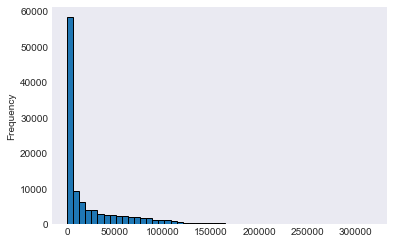

In [62]:
#Revisemos la distribución de los datos a través de un histograma
covid['total_cases_per_million'].plot.hist(bins = 50, edgecolor ='black')
plt.show()

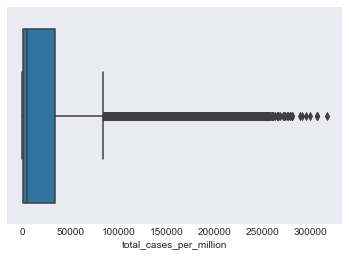

In [65]:
sns.boxplot(x=covid['total_cases_per_million'])
plt.show()

- Podemos decir que esta columna del dataset tiene una distribución fuertemente sesgada

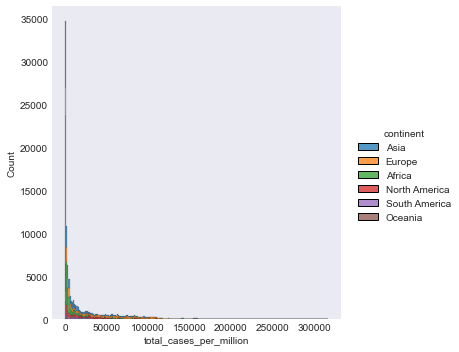

In [69]:
# Analicemos los datos por continente
sns.displot(covid, x ='total_cases_per_million', hue = 'continent', multiple ='stack')
plt.show()

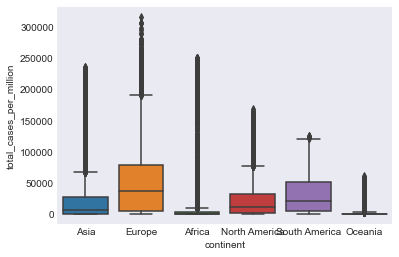

In [70]:
sns.boxplot(data=covid, x='continent', y='total_cases_per_million')
plt.show()